<a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://user-images.githubusercontent.com/26833433/98702494-b71c4e80-237a-11eb-87ed-17fcd6b3f066.jpg">

This notebook was written by Ultralytics LLC, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://www.ultralytics.com.

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [2]:
#!git clone https://github.com/ultralytics/yolov5  # clone repo
#%cd yolov5
#%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.7.1 _CudaDeviceProperties(name='GeForce GTX 1060 6GB', major=6, minor=1, total_memory=6144MB, multi_processor_count=10)


# 1. Inference

`detect.py` runs inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases).

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='data/images/', update=False, view_img=False, weights=['yolov5s.pt'])
Fusing layers... 
image 1/2 C:\projects\mealsuggestion\yolov5\data\images\bus.jpg: 640x480 4 persons, 1 bus, Done. (0.020s)
image 2/2 C:\projects\mealsuggestion\yolov5\data\images\zidane.jpg: 384x640 2 persons, 1 tie, Done. (0.016s)
Results saved to runs\detect\exp2
Done. (0.130s)


YOLOv5 v4.0-93-g95aefea torch 1.7.1 CUDA:0 (GeForce GTX 1060 6GB, 6144.0MB)

Model Summary: 224 layers, 7266973 parameters, 0 gradients, 17.0 GFLOPS


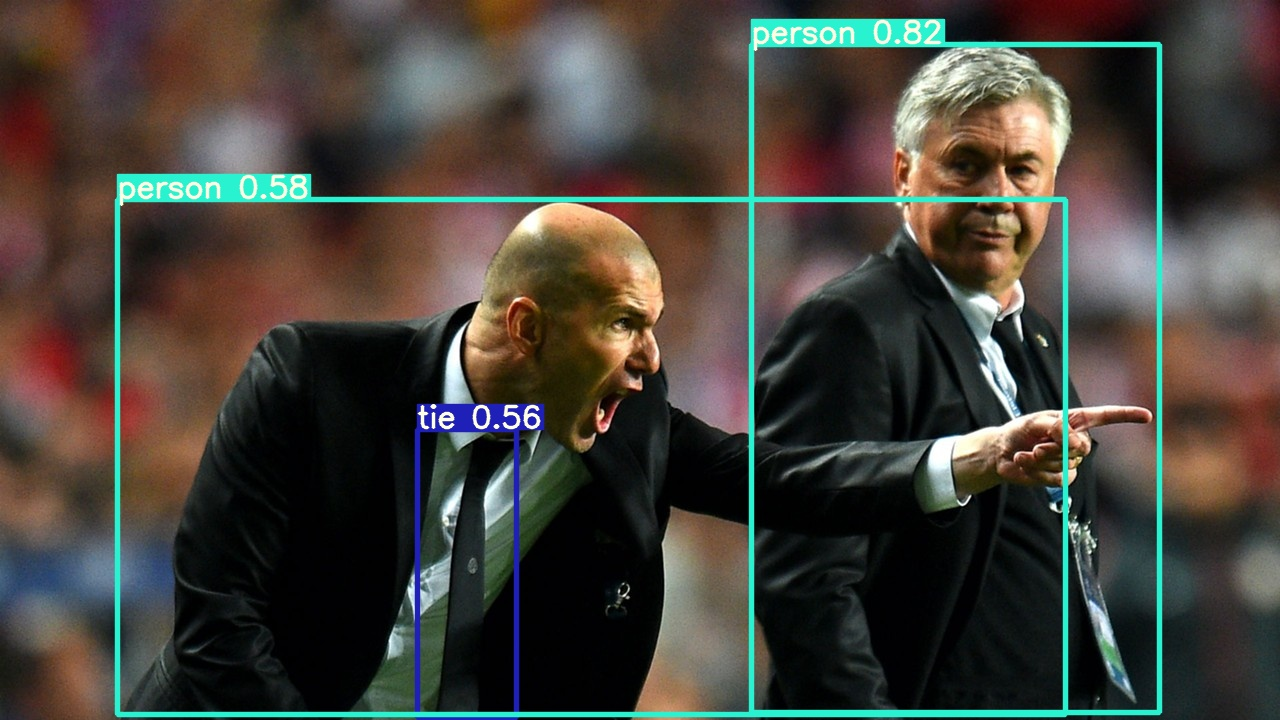

In [3]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/
Image(filename='runs/detect/exp/zidane.jpg', width=600)

Results are saved to `runs/detect`. A full list of available inference sources:
<img src="https://user-images.githubusercontent.com/26833433/98274798-2b7a7a80-1f94-11eb-91a4-70c73593e26b.jpg" width="900"> 

# 2. Test
Test a model on [COCO](https://cocodataset.org/#home) val or test-dev dataset to evaluate trained accuracy. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be 1-2% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

## COCO val2017
Download [COCO val 2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L14) dataset (1GB - 5000 images), and test model accuracy.

In [4]:
# Download COCO val2017
torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco2017val.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip

In [5]:
# Run YOLOv5x on COCO val2017
!python test.py --weights yolov5s.pt --data coco.yaml --img 640 --iou 0.65

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='.\\data\\coco.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.65, name='exp', project='runs/test', save_conf=False, save_hybrid=False, save_json=True, save_txt=False, single_cls=False, task='val', verbose=False, weights=['yolov5s.pt'])
Fusing layers... 
                 all       5e+03    3.63e+04       0.629       0.506       0.543       0.349
Speed: 6.8/4.0/10.8 ms inference/NMS/total per 640x640 image at batch-size 32

Evaluating pycocotools mAP... saving runs\test\exp2\yolov5s_predictions.json...
loading annotations into memory...
Done (t=0.78s)
creating index...
index created!
Loading and preparing results...
DONE (t=8.48s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=149.60s).
Accumulating evaluation results...
DONE (t=35.85s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.365
 Average Precision  (AP) @[ IoU=0.50    

YOLOv5 v4.0-93-g95aefea torch 1.7.1 CUDA:0 (GeForce GTX 1060 6GB, 6144.0MB)

Model Summary: 224 layers, 7266973 parameters, 0 gradients, 17.0 GFLOPS

Scanning images:   0%|          | 0/5000 [00:00<?, ?it/s]
val: Scanning '..\coco\val2017' for images and labels... 7 found, 0 missing, 0 empty, 0 corrupted:   0%|          | 7/5000 [00:00<01:14, 67.31it/s]
val: Scanning '..\coco\val2017' for images and labels... 16 found, 0 missing, 0 empty, 0 corrupted:   0%|          | 16/5000 [00:00<01:10, 70.92it/s]
val: Scanning '..\coco\val2017' for images and labels... 24 found, 0 missing, 0 empty, 0 corrupted:   0%|          | 24/5000 [00:00<01:09, 71.45it/s]
val: Scanning '..\coco\val2017' for images and labels... 31 found, 0 missing, 0 empty, 0 corrupted:   1%|          | 31/5000 [00:00<01:10, 70.37it/s]
val: Scanning '..\coco\val2017' for images and labels... 37 found, 0 missing, 0 empty, 0 corrupted:   1%|          | 37/5000 [00:00<01:19, 62.51it/s]
val: Scanning '..\coco\val2017' for images a

val: Scanning '..\coco\val2017' for images and labels... 3137 found, 29 missing, 0 empty, 0 corrupted:  63%|######3   | 3166/5000 [00:41<00:23, 77.90it/s]
val: Scanning '..\coco\val2017' for images and labels... 3145 found, 29 missing, 0 empty, 0 corrupted:  63%|######3   | 3174/5000 [00:41<00:23, 77.83it/s]
val: Scanning '..\coco\val2017' for images and labels... 3153 found, 29 missing, 0 empty, 0 corrupted:  64%|######3   | 3182/5000 [00:41<00:23, 77.33it/s]
val: Scanning '..\coco\val2017' for images and labels... 3161 found, 29 missing, 0 empty, 0 corrupted:  64%|######3   | 3190/5000 [00:41<00:23, 77.88it/s]
val: Scanning '..\coco\val2017' for images and labels... 3169 found, 29 missing, 0 empty, 0 corrupted:  64%|######3   | 3198/5000 [00:41<00:23, 77.82it/s]
val: Scanning '..\coco\val2017' for images and labels... 3177 found, 29 missing, 0 empty, 0 corrupted:  64%|######4   | 3206/5000 [00:41<00:23, 77.55it/s]
val: Scanning '..\coco\val2017' for images and labels... 3185 found, 2

## COCO test-dev2017
Download [COCO test2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L15) dataset (7GB - 40,000 images), to test model accuracy on test-dev set (20,000 images). Results are saved to a `*.json` file which can be submitted to the evaluation server at https://competitions.codalab.org/competitions/20794.

In [ ]:
# Download COCO test-dev2017
torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco2017labels.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip  # unzip labels
!f="test2017.zip" && curl http://images.cocodataset.org/zips/$f -o $f && unzip -q $f && rm $f  # 7GB,  41k images
%mv ./test2017 ./coco/images && mv ./coco ../  # move images to /coco and move /coco next to /yolov5

In [ ]:
# Run YOLOv5s on COCO test-dev2017 using --task test
!python test.py --weights yolov5s.pt --data coco.yaml --task test

# 3. Train

Download [COCO128](https://www.kaggle.com/ultralytics/coco128), a small 128-image tutorial dataset, start tensorboard and train YOLOv5s from a pretrained checkpoint for 3 epochs (note actual training is typically much longer, around **300-1000 epochs**, depending on your dataset).

In [11]:
# Download COCO128
torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip


^C


Train a YOLOv5s model on [COCO128](https://www.kaggle.com/ultralytics/coco128) with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and **COCO, COCO128, and VOC datasets are downloaded automatically** on first use.

All training results are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.


In [ ]:
# Tensorboard (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

In [12]:
# Weights & Biases (optional)
%pip install -q wandb  
!wandb login  # use 'wandb disabled' or 'wandb enabled' to disable or enable

^C
Note: you may need to restart the kernel to use updated packages.


Traceback (most recent call last):
  File "c:\coding\anaconda\envs\mealsuggestion\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\coding\anaconda\envs\mealsuggestion\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\coding\Anaconda\envs\mealsuggestion\Scripts\wandb.exe\__main__.py", line 7, in <module>
  File "c:\coding\anaconda\envs\mealsuggestion\lib\site-packages\click\core.py", line 829, in __call__
    return self.main(*args, **kwargs)
  File "c:\coding\anaconda\envs\mealsuggestion\lib\site-packages\click\core.py", line 782, in main
    rv = self.invoke(ctx)
  File "c:\coding\anaconda\envs\mealsuggestion\lib\site-packages\click\core.py", line 1259, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "c:\coding\anaconda\envs\mealsuggestion\lib\site-packages\click\core.py", line 1066, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "c:\coding\anaconda\envs

In [13]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 10 --epochs 3 --data coco128.yaml --weights yolov5s.pt --nosave --cache

github:  WARNING: code is out of date by 33 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.

Plotting labels... 

autoanchor: Analyzing anchors... anchors/target = 4.26, Best Possible Recall (BPR) = 0.9946
                 all         128         929       0.661       0.612       0.656       0.428
                 all         128         929       0.662       0.601       0.658        0.43
                 all         128         929       0.674       0.585       0.659       0.432
Optimizer stripped from runs\train\exp6\weights\last.pt, 14.8MB
Optimizer stripped from runs\train\exp6\weights\best.pt, 14.8MB



From https://github.com/ultralytics/yolov5
 + 5edf930...3e1ae11 voc        -> origin/voc  (forced update)
YOLOv5 v4.0-93-g95aefea torch 1.7.1 CUDA:0 (GeForce GTX 1060 6GB, 6144.0MB)

Namespace(adam=False, batch_size=10, bucket='', cache_images=True, cfg='', data='.\\data\\coco128.yaml', device='', epochs=3, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], linear_lr=False, local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs\\train\\exp6', single_cls=False, sync_bn=False, total_batch_size=10, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5

wandb: - 7.92MB of 13.12MB uploaded (0.00MB deduped)
wandb: \ 10.53MB of 13.15MB uploaded (0.00MB deduped)
wandb: | 12.28MB of 13.15MB uploaded (0.00MB deduped)
wandb: / 13.15MB of 13.15MB uploaded (0.00MB deduped)
wandb:                                                                                
wandb: Find user logs for this run at: C:\projects\mealsuggestion\yolov5\wandb\run-20210311_205439-1zuagts9\logs\debug.log
wandb: Find internal logs for this run at: C:\projects\mealsuggestion\yolov5\wandb\run-20210311_205439-1zuagts9\logs\debug-internal.log
wandb: Run summary:
wandb:         train/box_loss 0.04078
wandb:         train/obj_loss 0.05941
wandb:         train/cls_loss 0.02135
wandb:      metrics/precision 0.67375
wandb:         metrics/recall 0.58533
wandb:        metrics/mAP_0.5 0.65927
wandb:   metrics/mAP_0.5:0.95 0.43235
wandb:           val/box_loss 0.03878
wandb:           val/obj_loss 0.04125
wandb:           val/cls_loss 0.01315
wandb:                  x/lr0 0.00015
w

# 4. Visualize

## Weights & Biases Logging 🌟 NEW

[Weights & Biases](https://www.wandb.com/) (W&B) is now integrated with YOLOv5 for real-time visualization and cloud logging of training runs. This allows for better run comparison and introspection, as well improved visibility and collaboration for teams. To enable W&B `pip install wandb`, and then train normally (you will be guided through setup on first use). 

During training you will see live updates at [https://wandb.ai/home](https://wandb.ai/home), and you can create and share detailed [Reports](https://wandb.ai/glenn-jocher/yolov5_tutorial/reports/YOLOv5-COCO128-Tutorial-Results--VmlldzozMDI5OTY) of your results. For more information see the [YOLOv5 Weights & Biases Tutorial](https://github.com/ultralytics/yolov5/issues/1289). 

<img src="https://user-images.githubusercontent.com/26833433/98184457-bd3da580-1f0a-11eb-8461-95d908a71893.jpg" width="800">

## Local Logging

All results are logged by default to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc. View train and test jpgs to see mosaics, labels, predictions and augmentation effects. Note a **Mosaic Dataloader** is used for training (shown below), a new concept developed by Ultralytics and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

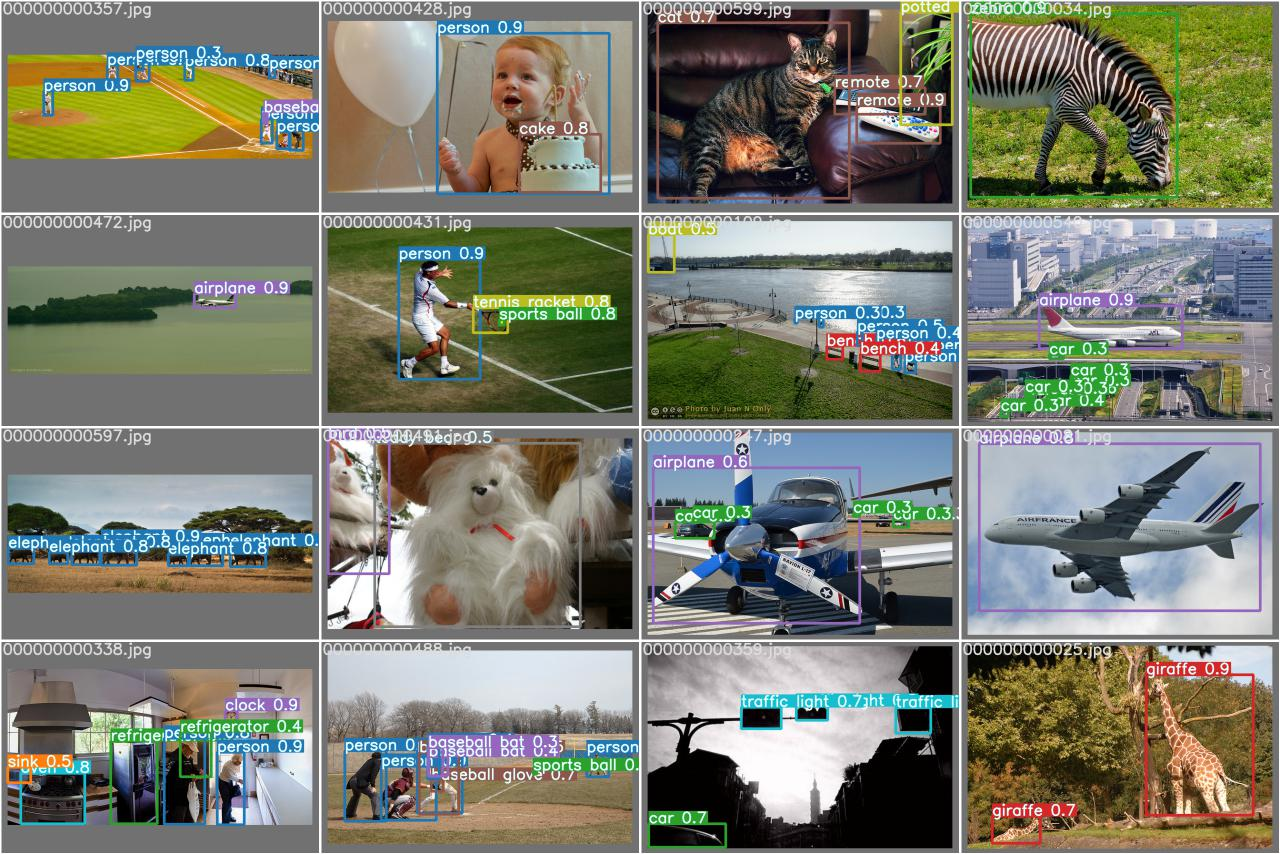

In [15]:
Image(filename='runs/train/exp/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels
Image(filename='runs/train/exp/test_batch0_labels.jpg', width=800)  # test batch 0 labels
Image(filename='runs/train/exp/test_batch0_pred.jpg', width=800)  # test batch 0 predictions

> <img src="https://user-images.githubusercontent.com/26833433/83667642-90fcb200-a583-11ea-8fa3-338bbf7da194.jpeg" width="750">  
`train_batch0.jpg` shows train batch 0 mosaics and labels

> <img src="https://user-images.githubusercontent.com/26833433/83667626-8c37fe00-a583-11ea-997b-0923fe59b29b.jpeg" width="750">  
`test_batch0_labels.jpg` shows test batch 0 labels

> <img src="https://user-images.githubusercontent.com/26833433/83667635-90641b80-a583-11ea-8075-606316cebb9c.jpeg" width="750">  
`test_batch0_pred.jpg` shows test batch 0 _predictions_


Training losses and performance metrics are also logged to [Tensorboard](https://www.tensorflow.org/tensorboard) and a custom `results.txt` logfile which is plotted as `results.png` (below) after training completes. Here we show YOLOv5s trained on COCO128 to 300 epochs, starting from scratch (blue), and from pretrained `--weights yolov5s.pt` (orange).

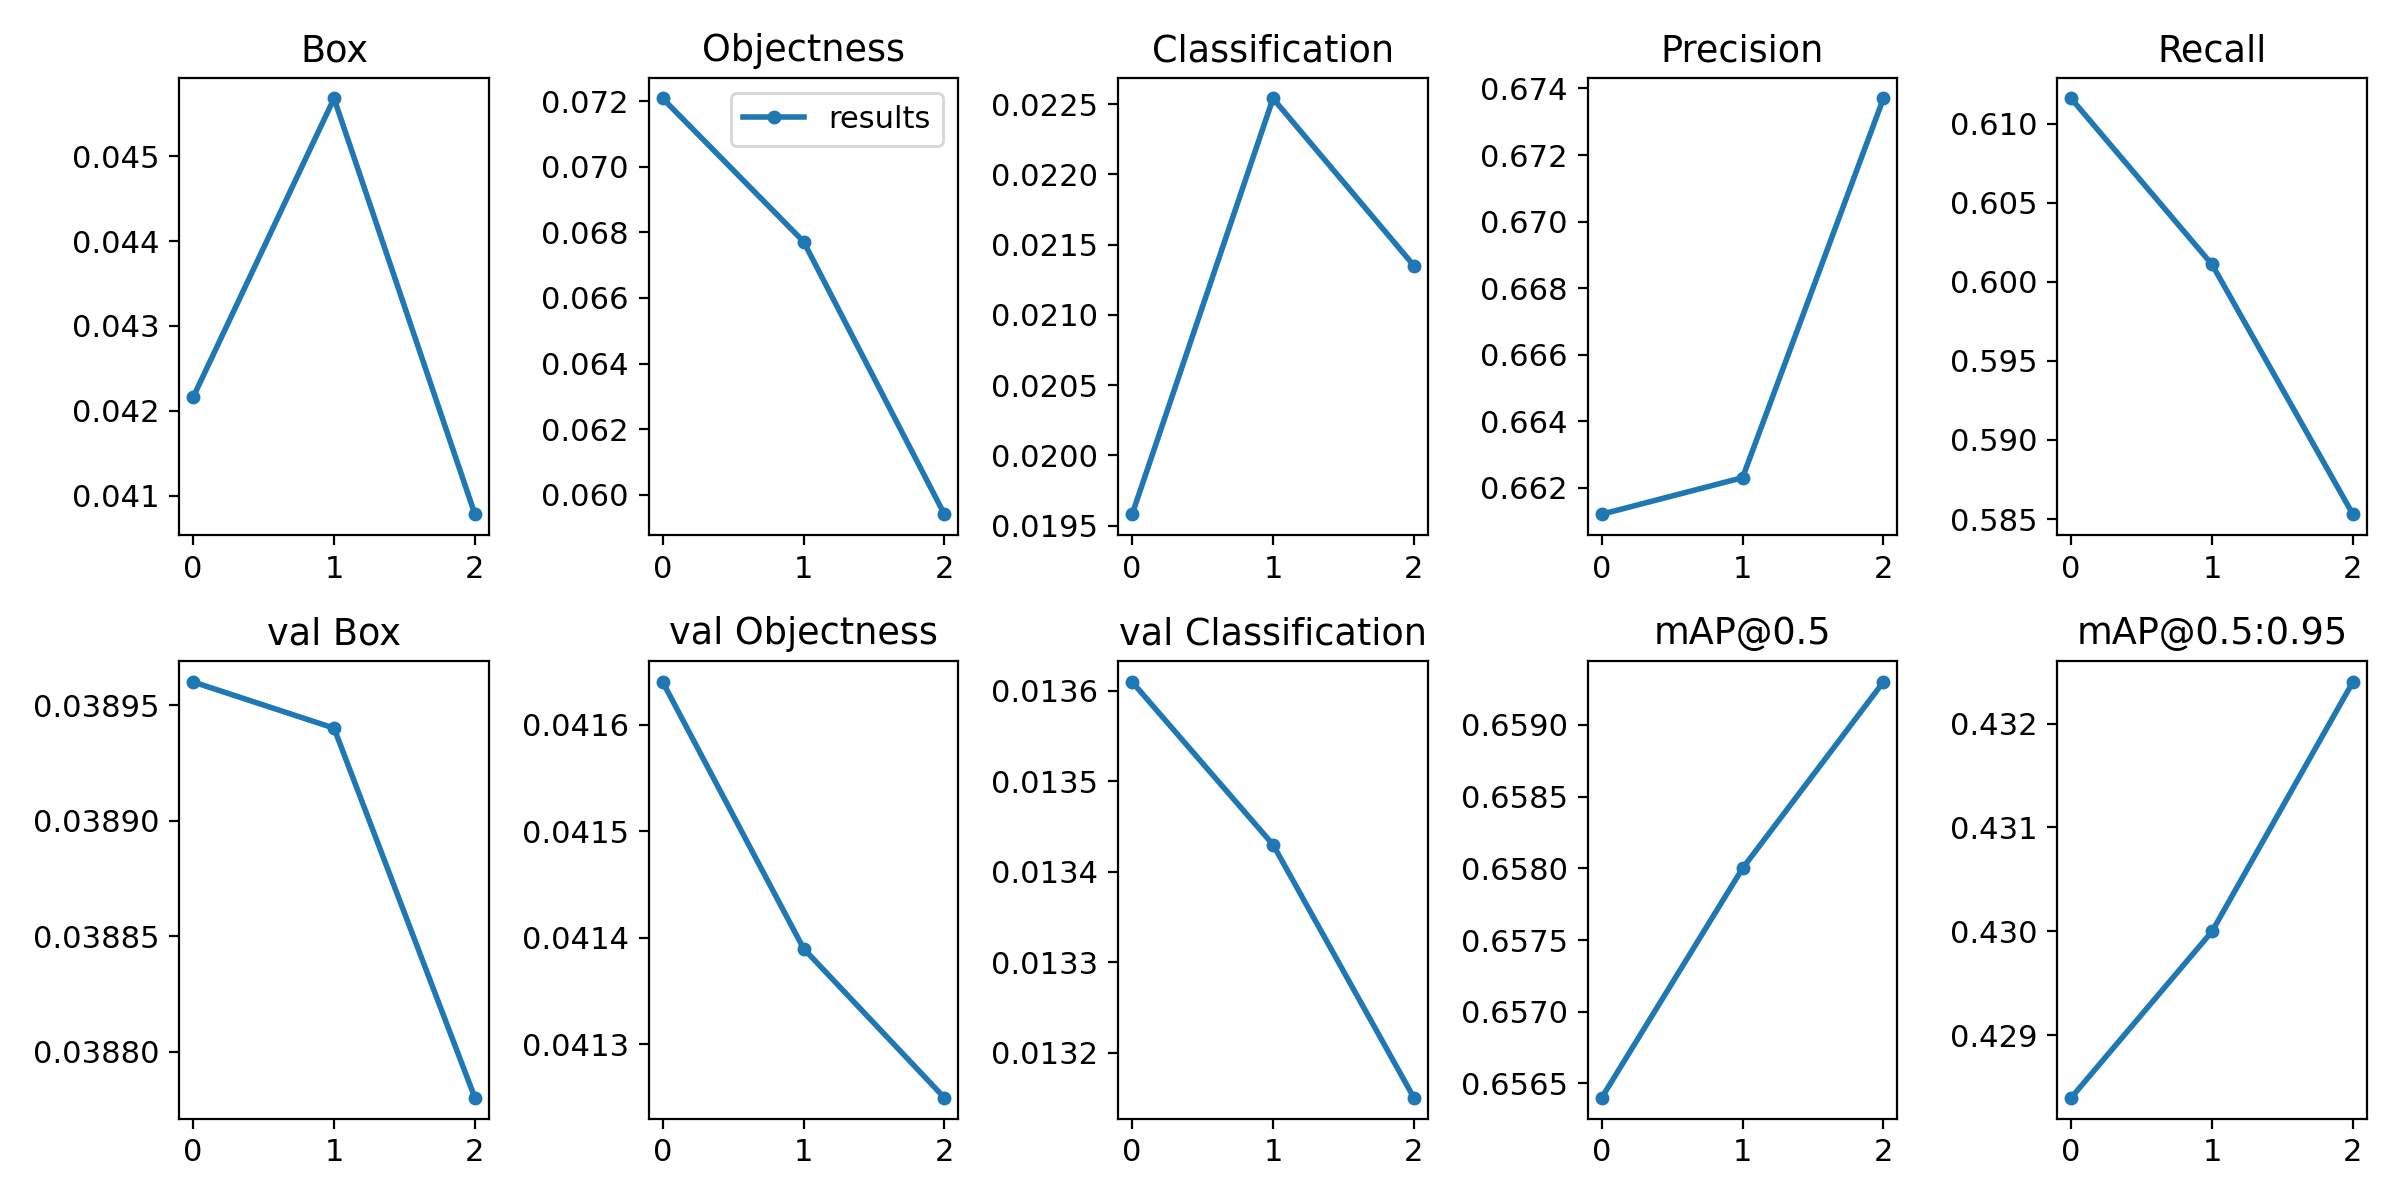

In [16]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp')  # plot all results*.txt as results.png
Image(filename='runs/train/exp/results.png', width=800)

<img src="https://user-images.githubusercontent.com/26833433/97808309-8182b180-1c66-11eb-8461-bffe1a79511d.png" width="800">


# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Google Colab and Kaggle** notebooks with free GPU: <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/GCP-Quickstart)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/AWS-Quickstart)
- **Docker Image**. See [Docker Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/Docker-Quickstart) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![CI CPU testing](https://github.com/ultralytics/yolov5/workflows/CI%20CPU%20testing/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([test.py](https://github.com/ultralytics/yolov5/blob/master/test.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/models/export.py)) on MacOS, Windows, and Ubuntu every 24 hours and on every commit.


# Appendix

Optional extras below. Unit tests validate repo functionality and should be run on any PRs submitted.


In [ ]:
# Re-clone repo
%cd ..
%rm -rf yolov5 && git clone https://github.com/ultralytics/yolov5
%cd yolov5

In [ ]:
# Reproduce
%%shell
for x in yolov5s yolov5m yolov5l yolov5x; do
  python test.py --weights $x.pt --data coco.yaml --img 640 --conf 0.25 --iou 0.45  # speed
  python test.py --weights $x.pt --data coco.yaml --img 640 --conf 0.001 --iou 0.65  # mAP
done

In [ ]:
# Unit tests
%%shell
export PYTHONPATH="$PWD"  # to run *.py. files in subdirectories

rm -rf runs  # remove runs/
for m in yolov5s; do  # models
  python train.py --weights $m.pt --epochs 3 --img 320 --device 0  # train pretrained
  python train.py --weights '' --cfg $m.yaml --epochs 3 --img 320 --device 0  # train scratch
  for d in 0 cpu; do  # devices
    python detect.py --weights $m.pt --device $d  # detect official
    python detect.py --weights runs/train/exp/weights/best.pt --device $d  # detect custom
    python test.py --weights $m.pt --device $d # test official
    python test.py --weights runs/train/exp/weights/best.pt --device $d # test custom
  done
  python hubconf.py  # hub
  python models/yolo.py --cfg $m.yaml  # inspect
  python models/export.py --weights $m.pt --img 640 --batch 1  # export
done

In [ ]:
# Profile
from utils.torch_utils import profile 

m1 = lambda x: x * torch.sigmoid(x)
m2 = torch.nn.SiLU()
profile(x=torch.randn(16, 3, 640, 640), ops=[m1, m2], n=100)

In [ ]:
# Evolve
!python train.py --img 640 --batch 64 --epochs 100 --data coco128.yaml --weights yolov5s.pt --cache --noautoanchor --evolve
!d=runs/train/evolve && cp evolve.* $d && zip -r evolve.zip $d && gsutil mv evolve.zip gs://bucket  # upload results (optional)

In [ ]:
# VOC
for b, m in zip([64, 48, 32, 16], ['yolov5s', 'yolov5m', 'yolov5l', 'yolov5x']):  # zip(batch_size, model)
  !python train.py --batch {b} --weights {m}.pt --data voc.yaml --epochs 50 --cache --img 512 --nosave --hyp hyp.finetune.yaml --project VOC --name {m}